Антонов Егор, БПМ-214 \
Вариант №1

**Задача №3.1.1** Дана система уравнений $Ax=b$ порядка $n$. Исследовать зависимость погрешности решения $x$ от
погрешностей правой части системы $b$.  

In [3]:
import numpy as np

Задаём матрицу системы $A$ и вектор правой части $b$:

In [4]:
N = 1
n = 6
A = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        c = 0.1 * N * (i + 1) * (j + 1)
        A[i, j] = 15 / (4 * c**5 + 6 * c + 1)

b = np.full(n, N)

print(A)
print(b)

[[9.37476563e+00 6.81421718e+00 5.33861025e+00 4.35924858e+00
  3.63636364e+00 3.05434287e+00]
 [6.81421718e+00 4.35924858e+00 3.05434287e+00 2.10949102e+00
  1.36363636e+00 8.26296956e-01]
 [5.33861025e+00 3.05434287e+00 1.71194573e+00 8.26296956e-01
  3.71517028e-01 1.71658653e-01]
 [4.35924858e+00 2.10949102e+00 8.26296956e-01 2.85480246e-01
  1.06382979e-01 4.49229625e-02]
 [3.63636364e+00 1.36363636e+00 3.71517028e-01 1.06382979e-01
  3.68890255e-02 1.51362260e-02]
 [3.05434287e+00 8.26296956e-01 1.71658653e-01 4.49229625e-02
  1.51362260e-02 6.14440069e-03]]
[1 1 1 1 1 1]


Используя встроенную функцию, находим решение $x$ системы $Ax=b$ с помощью метода Гаусса:

In [5]:
x = np.linalg.solve(A, b)
print(x)

[ 0.48707708 -0.69111259  0.78559889 -1.60128553  1.603179   -0.62212679]


In [6]:
A@x

array([1., 1., 1., 1., 1., 1.])

С помощью встроенной функции вычисляем число обусловленности матрицы $A$:

In [8]:
cond = np.linalg.cond(A, np.inf)
print(cond)

11705.192522398109


Принимая решение $x$, полученное в пункте 1, за точное, вычисляем вектор $d = (d_1, \dots, d_n)^T$, $ d_i=\frac{||x-x^i||_{\infty}}{||x||_{\infty}}, i = 1, \dots, n $, отоносительных погрешностей решений $x^i$ систем $A x^i = b^i, i = 1, \dots, n$, где компоненты векторов $b^i$ вычисляются по формулам:
$$
b^{i}_{k}=
\begin{cases}
b_k + \Delta, i=k, \\
b_k, i \neq k,
\end{cases}
k = 1, \dots, n
$$

In [9]:
def foo(delta, A, b, x, n):
    d = np.zeros(n)
    for i in range(n):
        b_i = np.copy(b)
        b_i[i] += delta
        x_i = np.linalg.solve(A, b_i)
        d[i] = np.linalg.norm(x - x_i, ord=np.inf) / np.linalg.norm(x, ord=np.inf)
    return d

In [10]:
d = foo(1, A, b, x, n)
print(d)

[ 1.36902306  8.9633055  30.8138935  67.80832656 79.37644814 35.78773264]


На основе вычисленного вектора $d$ строим гистограмму. По гистограмме определяем компоненту
$b_m$ вектора $b$, которая оказывает наибольшее влияние на погрешность решения. 

In [11]:
import matplotlib.pyplot as plt

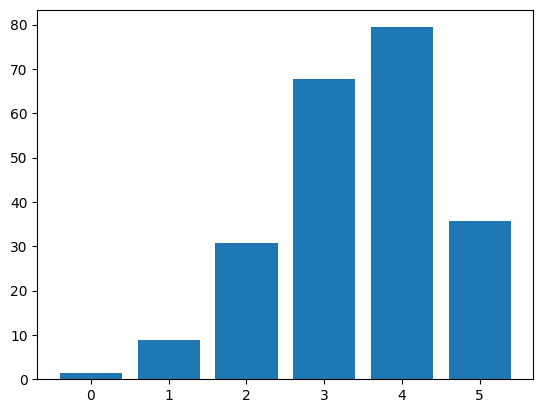

In [12]:
plt.bar([0, 1, 2, 3, 4, 5], d)
plt.show()

Оценим теоретически погрешность решения $x^m$ по формуле: $ \delta(x^m) \leq cond(A) \cdot \delta(b^m) $. Сравниваем значение
$\delta(x^m)$ со значением практической погрешности $d_m$:

In [14]:
delta=1

b_new = b.copy()
b_new[np.argmax(d)] += delta
x_new = np.linalg.solve(A, b_new)
delta_b = np.linalg.norm((b - b_new), ord=np.inf) / np.linalg.norm(b, ord=np.inf)

print(f'delta(x_m) = {d[np.argmax(d)]}')
print(f'delta(b_m) = {delta_b}')
print(f'cond(A) = {cond}')
print(f'\ndelta(x_m) <= cond(A) * delta(b_m)')
print(f'\n{d[np.argmax(d)]} <= {cond * delta_b}')

delta(x_m) = 79.37644813658373
delta(b_m) = 1.0
cond(A) = 11705.192522398109

delta(x_m) <= cond(A) * delta(b_m)

79.37644813658373 <= 11705.192522398109


**Задача №3.5.1** Дана система уравнений $Ax=b$ порядка $n$ с симметричной положительно определенной
матрицей $A$. Решить систему методом Холецкого. 

In [16]:
n=40
m=10
A = np.zeros((n, n))
b = np.zeros(n)

for i in range(n):
    for j in range(n):
        if (i == j):
            A[i, j] = n + m**2 + (j + 1) / m + (i + 1) / n
        else:
            A[i, j] = (i + j + 2) / (m + n)

for i in range(n):
    b[i] = n * (i + 1) + m

print(A)
print(b)

[[1.40125e+02 6.00000e-02 8.00000e-02 ... 7.80000e-01 8.00000e-01
  8.20000e-01]
 [6.00000e-02 1.40250e+02 1.00000e-01 ... 8.00000e-01 8.20000e-01
  8.40000e-01]
 [8.00000e-02 1.00000e-01 1.40375e+02 ... 8.20000e-01 8.40000e-01
  8.60000e-01]
 ...
 [7.80000e-01 8.00000e-01 8.20000e-01 ... 1.44750e+02 1.54000e+00
  1.56000e+00]
 [8.00000e-01 8.20000e-01 8.40000e-01 ... 1.54000e+00 1.44875e+02
  1.58000e+00]
 [8.20000e-01 8.40000e-01 8.60000e-01 ... 1.56000e+00 1.58000e+00
  1.45000e+02]]
[  50.   90.  130.  170.  210.  250.  290.  330.  370.  410.  450.  490.
  530.  570.  610.  650.  690.  730.  770.  810.  850.  890.  930.  970.
 1010. 1050. 1090. 1130. 1170. 1210. 1250. 1290. 1330. 1370. 1410. 1450.
 1490. 1530. 1570. 1610.]


In [17]:
def cholesky(A):
    n = len(A)
    L = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1):
            if i == j:
                sum_val = sum(L[i][k] ** 2 for k in range(j))
                L[i][j] = np.sqrt(A[i][i] - sum_val)
            else:
                sum_val = sum(L[i][k] * L[j][k] for k in range(j))
                L[i][j] = (A[i][j] - sum_val) / L[j][j]

    return L

In [20]:
L = cholesky(A)
print(L)

[[1.18374406e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.06866324e-03 1.18427182e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.75821765e-03 8.44111489e-03 1.18479907e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.58926221e-02 6.75238572e-02 6.91243544e-02 ... 1.20191704e+01
  0.00000000e+00 0.00000000e+00]
 [6.75821765e-02 6.92119356e-02 7.08102379e-02 ... 1.03628522e-01
  1.20235092e+01 0.00000000e+00]
 [6.92717309e-02 7.09000139e-02 7.24961215e-02 ... 1.04882511e-01
  1.05179684e-01 1.20278149e+01]]


In [21]:
y = np.linalg.solve(L, b)
print(y)

[  4.22388603   7.59779884  10.96450223  14.3216281   17.66683796
  20.99783002  24.31234603  27.60817785  30.88317373  34.13524418
  37.36236754  40.5625951   43.73405574  46.87496027  49.98360514
  53.05837577  56.09774941  59.10029747  62.06468739  64.98968405
  67.87415071  70.71704951  73.51744148  76.27448622  78.98744111
  81.6556602   84.27859269  86.85578117  89.38685946  91.87155028
  94.30966262  96.7010889   99.04580196 101.3438519  103.59536272
 105.80052896 107.95961217 110.07293736 112.14088941 114.16390942]


In [22]:
x = np.linalg.solve(np.transpose(L), y)
print(x)

[-0.39887779 -0.1394304   0.11970252  0.37852154  0.63702723  0.89522016
  1.15310089  1.41067     1.66792805  1.9248756   2.1815132   2.43784144
  2.69386085  2.949572    3.20497545  3.46007175  3.71486145  3.96934512
  4.22352329  4.47739651  4.73096535  4.98423033  5.23719202  5.48985095
  5.74220767  5.99426272  6.24601663  6.49746996  6.74862323  6.99947698
  7.25003176  7.50028809  7.7502465   7.99990753  8.24927171  8.49833957
  8.74711163  8.99558843  9.24377048  9.49165832]


In [23]:
np.linalg.solve(A, b)

array([-0.39887779, -0.1394304 ,  0.11970252,  0.37852154,  0.63702723,
        0.89522016,  1.15310089,  1.41067   ,  1.66792805,  1.9248756 ,
        2.1815132 ,  2.43784144,  2.69386085,  2.949572  ,  3.20497545,
        3.46007175,  3.71486145,  3.96934512,  4.22352329,  4.47739651,
        4.73096535,  4.98423033,  5.23719202,  5.48985095,  5.74220767,
        5.99426272,  6.24601663,  6.49746996,  6.74862323,  6.99947698,
        7.25003176,  7.50028809,  7.7502465 ,  7.99990753,  8.24927171,
        8.49833957,  8.74711163,  8.99558843,  9.24377048,  9.49165832])

**Задача №3.10.1** Дана система уравнений $Ax=b$ порядка $n$ с разреженной матрицей $A$. Решить систему методом
прогонки.

In [24]:
n = 50
A = np.zeros((n, n))
b = np.zeros(n)

for i in range(n):
    for j in range(n):
        if (i - j == 0):
            A[i, j] = 1000
        elif (i - j == -1):
            A[i, j] = 1
        elif (i - j == -3):
            A[i, j] = 1
        elif (i - j == 1):
            A[i, j] = 1

for i in range(n):
    b[i] = (i + 1) * np.exp(18 / (i + 1))

print(A)
print(b)

[[1000.    1.    0. ...    0.    0.    0.]
 [   1. 1000.    1. ...    0.    0.    0.]
 [   0.    1. 1000. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1000.    1.    0.]
 [   0.    0.    0. ...    1. 1000.    1.]
 [   0.    0.    0. ...    0.    1. 1000.]]
[6.56599691e+07 1.62061679e+04 1.21028638e+03 3.60068525e+02
 1.82991172e+02 1.20513222e+02 9.15915227e+01 7.59018867e+01
 6.65015049e+01 6.04964746e+01 5.65010323e+01 5.37802688e+01
 5.19127665e+01 5.06415110e+01 4.98017538e+01 4.92834696e+01
 4.90106133e+01 4.89290729e+01 4.89993680e+01 4.91920622e+01
 4.94847873e+01 4.98602589e+01 5.03049213e+01 5.08080004e+01
 5.13608303e+01 5.19563649e+01 5.25888191e+01 5.32534000e+01
 5.39461046e+01 5.46635640e+01 5.54029236e+01 5.61617490e+01
 5.69379516e+01 5.77297298e+01 5.85355215e+01 5.93539657e+01
 6.01838714e+01 6.10241917e+01 6.18740030e+01 6.27324874e+01
 6.35989180e+01 6.44726464e+01 6.53530929e+01 6.62397372e+01
 6.71321114e+01 6.80297932e+01 6.89324008e+01 6.98395879e+01
 7.0

In [25]:
def thomas_method(A, x, i, b):
    n = len(A)

    if 0 <= i - 1:
        x[i] = (b[i] - thomas_method(A, x, i - 1, b)) / 1000
        return x[i]

    if 0 <= i - 1 and i + 1 < n:
        x[i] = (b[i] - thomas_method(A, x, i - 1, b) - x[i + 1]) / 1000
        return x[i]

    if 0 <= i - 1 and i + 3 < n:
        x[i] = (b[i] - thomas_method(A, x, i - 1, b) - x[i + 1] - x[i + 3]) / 1000
        return x[i]

    if 0 <= i and i + 3 < n:
        x[i] = (b[i] - x[i + 1] - x[i + 3]) / 1000
        return x[i]


In [26]:
x = np.zeros(n)
thomas_method(A, x, n-1, b)
print(x)

[ 6.56599691e+04 -4.94538013e+01  1.25974018e+00  3.58808785e-01
  1.82632363e-01  1.20330589e-01  9.14711921e-02  7.58104155e-02
  6.64256945e-02  6.04300489e-02  5.64406023e-02  5.37238282e-02
  5.18590426e-02  5.05896520e-02  4.97511642e-02  4.92337184e-02
  4.89613796e-02  4.88801115e-02  4.89504879e-02  4.91431117e-02
  4.94356442e-02  4.98108233e-02  5.02551105e-02  5.07577453e-02
  5.13100725e-02  5.19050549e-02  5.25369141e-02  5.32008631e-02
  5.38929037e-02  5.46096711e-02  5.53483140e-02  5.61064007e-02
  5.68818452e-02  5.76728480e-02  5.84778487e-02  5.92954879e-02
  6.01245759e-02  6.09640671e-02  6.18130389e-02  6.26706744e-02
  6.35362473e-02  6.44091101e-02  6.52886838e-02  6.61744485e-02
  6.70659369e-02  6.79627272e-02  6.88644380e-02  6.97707235e-02
  7.06812693e-02  7.15957895e-02]


In [27]:
print(A@x)
print(b)

[6.56599200e+07 1.62076102e+04 1.21076552e+03 3.60342629e+02
 1.83187313e+02 1.20671118e+02 9.17277632e+01 7.60247530e+01
 6.66156588e+01 6.06047743e+01 5.66053458e+01 5.38818791e+01
 5.20125898e+01 5.07402235e+01 4.98998677e+01 4.93813815e+01
 4.91086366e+01 4.90274590e+01 4.90983219e+01 4.92917530e+01
 4.95853559e+01 4.99618241e+01 5.04075841e+01 5.09118474e+01
 5.14659362e+01 5.20627947e+01 5.26966296e+01 5.33626413e+01
 5.40568207e+01 5.47757942e+01 5.55167029e+01 5.62771087e+01
 5.70549200e+01 5.78483323e+01 5.86557811e+01 5.94759034e+01
 6.03075061e+01 6.11495410e+01 6.20010828e+01 6.28613124e+01
 6.37295015e+01 6.46050010e+01 6.54872301e+01 6.63756676e+01
 6.72698448e+01 6.81693389e+01 6.90737673e+01 6.99102692e+01
 7.08226358e+01 7.16664707e+01]
[6.56599691e+07 1.62061679e+04 1.21028638e+03 3.60068525e+02
 1.82991172e+02 1.20513222e+02 9.15915227e+01 7.59018867e+01
 6.65015049e+01 6.04964746e+01 5.65010323e+01 5.37802688e+01
 5.19127665e+01 5.06415110e+01 4.98017538e+01 4.92834

In [28]:
(A@x - b) / np.max(np.abs(b))

array([-7.47715741e-07,  2.19673046e-08,  7.29728296e-09,  4.17459160e-09,
        2.98722353e-09,  2.40476638e-09,  2.07493951e-09,  1.87125121e-09,
        1.73856124e-09,  1.64940140e-09,  1.58869219e-09,  1.54752139e-09,
        1.52030791e-09,  1.50339004e-09,  1.49427164e-09,  1.49119576e-09,
        1.49289170e-09,  1.49841880e-09,  1.50706643e-09,  1.51828817e-09,
        1.53165726e-09,  1.54683568e-09,  1.56355237e-09,  1.58158750e-09,
        1.60076100e-09,  1.62092397e-09,  1.64195225e-09,  1.66374153e-09,
        1.68620353e-09,  1.70926305e-09,  1.73285565e-09,  1.75692580e-09,
        1.78142539e-09,  1.80631252e-09,  1.83155059e-09,  1.85710740e-09,
        1.88295461e-09,  1.90906709e-09,  1.93542254e-09,  1.96200109e-09,
        1.98878495e-09,  2.01575819e-09,  2.04290647e-09,  2.07021686e-09,
        2.09767766e-09,  2.12527830e-09,  2.15300913e-09,  1.07647430e-09,
        1.09040242e-09,  0.00000000e+00])